##"UNVEILING THE COST DRIVERS IN HEALTHCARE: A LINEAR REGRESSION APPROACH TO PREDICTING MEDICAL EXPENDITURES""

GRINGO R. VELASCO
AUGUST 28, 2023


#BACKGROUND

The healthcare industry plays a critical role in society, providing essential medical services to individuals of all backgrounds. However, the costs associated with medical treatments and services are a significant concern for both patients and healthcare providers. The ability to accurately predict medical costs can aid in resource allocation, insurance pricing, and policy decisions. In this context, the application of machine learning techniques, such as linear regression, offers a promising approach to understanding the factors that contribute to medical expenses.

# RATIONALE
The project aims to contribute to a deeper understanding of the factors influencing medical costs, enabling stakeholders to make informed decisions and take proactive measures to manage healthcare expenses effectively. Through the application of linear regression and analysis of the dataset, the intention is to shed light on the complex relationship between patient attributes and medical charges, ultimately benefitting patients, healthcare providers, insurance companies, and policymakers alike.

Relatively, the project objectives are:

*   Identifying Key Predictors
By applying linear regression, we can determine which factors are most strongly correlated with higher medical costs.

*   Risk Assessment and Insurance Pricing
The project aims to provide insights into how these characteristics affect the financial risk for insurers and the potential cost burden for individuals.

*   Healthcare Resource Allocation:
Governments and healthcare institutions need to allocate resources efficiently to provide adequate medical services. Understanding the relationship between patient attributes and medical costs can assist in optimizing resource allocation and budget planning.

*   Policy Implications
The findings from the projecty can guide policymakers in making informed decisions about healthcare policies and regulations.







#WORKFLOW
1.   IMPORT LIBRARIES
2.   MOUNT DRIVE AND LOAD DATA
3.   EDA
4.   CREATE DATA VISUALIZATION
5.   PREPARE DATA FOR MODELLING
6.   CREATE LINEAR REGRESSION MODEL

#1. IMPORT LIBRARIES

In [78]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pickle
import joblib

#2. MOUNT DRIVE AND LOAD DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = '/content/drive/MyDrive/GITHUB PROJECTS/MEDICAL_COST_LINEAR_REGRESSION/medical_cost.csv'
df = pd.read_csv(file)

df.head()
#load the data

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


#3. PERFORM EDA

#DATA EXPLORATION

In [4]:
df.shape #there are 1338 rows and 8 columnS


(1338, 8)

In [5]:
df.info() #check data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [6]:
df.isna().sum() #check for missing data
#no missing data

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum() #no duplicated values

0

In [8]:
df.describe() #check for outlier

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [9]:
#create a for function to display the unique value for all columns
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        unique_values.sort()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print()

# Call the function with your DataFrame
display_unique_values(df)

Unique values in column 'Id':
[   1    2    3 ... 1336 1337 1338]

Unique values in column 'age':
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]

Unique values in column 'sex':
['female' 'male']

Unique values in column 'bmi':
[15.96  16.815 17.195 17.29  17.385 17.4   17.48  17.67  17.765 17.8
 17.86  17.955 18.05  18.3   18.335 18.5   18.6   18.715 18.905 19.
 19.095 19.19  19.3   19.475 19.57  19.8   19.855 19.95  20.045 20.1
 20.13  20.235 20.3   20.35  20.4   20.425 20.52  20.6   20.615 20.7
 20.79  20.8   20.9   21.01  21.09  21.12  21.28  21.3   21.375 21.4
 21.47  21.5   21.56  21.565 21.66  21.7   21.755 21.78  21.8   21.85
 21.89  21.945 22.    22.04  22.1   22.135 22.22  22.23  22.3   22.42
 22.515 22.6   22.61  22.705 22.77  22.8   22.88  22.895 22.99  23.
 23.085 23.1   23.18  23.2   23.21  23.275 23.3   23.32  23.37  23.4
 23.465 23.54  23.56  23.6   23.65  23.655 23.7   23.75

# Data is CLEAN, no data issue identified

##DATA VISUALIZATION

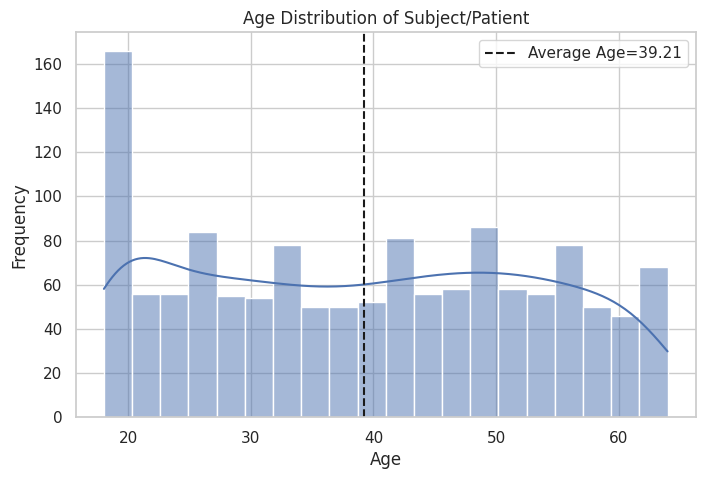

In [65]:
plt.figure(figsize=(8,5)) 			# initialize the figure
sns.histplot(df['age'], bins=20, kde=True)	# create a histogram with Age as the variable to visualize
plt.ylabel("Frequency") 			# add labels to the plot
plt.xlabel("Age")
plt.title("Age Distribution of Subject/Patient")	# add title to the plot
plt.axvline(df['age'].mean(), color="k", ls="--", label=f"Average Age={round(df['age'].mean(),2)}")
plt.legend();					# create a legend in the graph

The histogram shows the age distribution of all subject in the dataset. Average age of patient is 39 years old as indicated by the broken line in the chart. Chart also shows that the highest distribution of patient is within the 10=18 age range with the lowest on the age of 60.

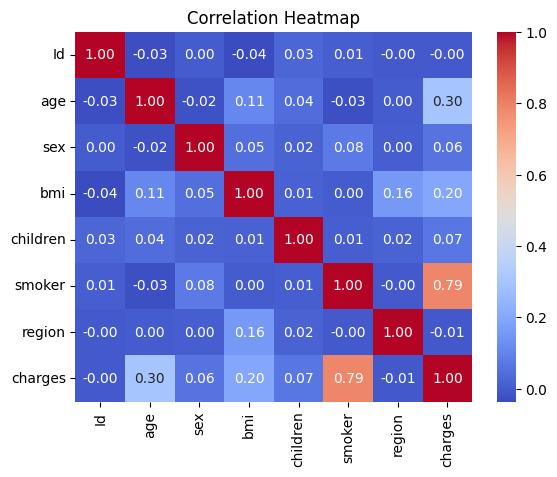

In [27]:
correlation_matrix = df.corr()
# Create the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Set the title for the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show();

The heatmap displays the correlation matrix of the numerics features in the dataset. Do note however that this heatmap was generated after performing label encoding for non-numeric features including sex, smoker, and region. Figure shows that there is a medium to high correlation between smoking and the target features medical charges. It's important to note that correlation does not imply causation. Even if two variables have a high correlation, it does not necessarily mean that one causes the other. Correlation measures only the strength and direction of the linear relationship between variables.

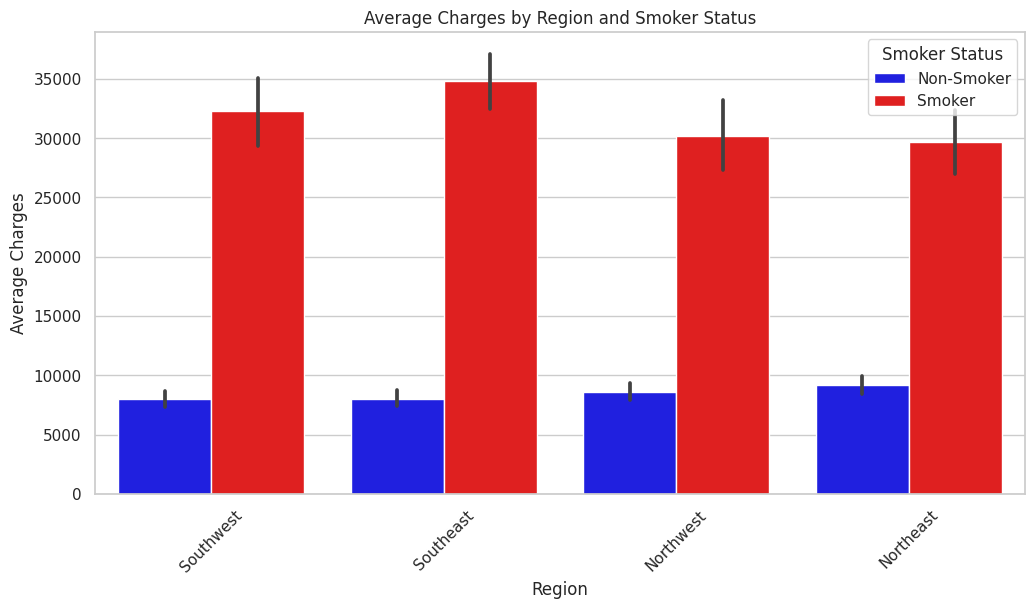

In [63]:
# Define a dictionary to map encoded region values to their original names
region_mapping = {0: 'Northeast', 1: 'Northwest', 2: 'Southeast', 3: 'Southwest'}

# Map the encoded region values back to their original names in the DataFrame
df['region_name'] = df['region'].map(region_mapping)

# Create a bar chart of average charges for smokers and non-smokers per region
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='region_name', y='charges', hue='smoker', data=df, palette=['blue', 'red'])
ax.set_facecolor('white')  # Set the background color of the plot

plt.title('Average Charges by Region and Smoker Status')
plt.xlabel('Region')
plt.ylabel('Average Charges')

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=['Non-Smoker', 'Smoker'], title='Smoker Status', loc='upper right')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show();


The barchart shows the average medical charges for smoker and non-smoker per region. It is notable that for all regions, smokers tend to incur higher medical costs compare to non-smokers with Southeast region being the highest with approximately 39k and Northeast scoring the lowest with approximately 28k.

##5. PREPARE DATA FOR MODELLING

In [12]:
#check df
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains object (categorical) data
        df[col] = label_encoder.fit_transform(df[col])  # Apply label encoding to the column

# Now, all object (categorical) columns in the DataFrame have been label encoded.

In [14]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0,1,3,16884.92400
1,2,18,1,33.770,1,0,2,1725.55230
2,3,28,1,33.000,3,0,2,4449.46200
3,4,33,1,22.705,0,0,1,21984.47061
4,5,32,1,28.880,0,0,1,3866.85520


In [15]:
df.info() #check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


#IDENTIFY TARGET AND FEATURES and PERFORM TRAIN TEST SPLIT

In [16]:
#separate the features (X) and the target (y) column
X = df.drop(columns = ['Id', 'charges'])
y = df['charges']


In [17]:

X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [18]:
X_train, X_test,  y_train, y_test = train_test_split(X,y, random_state=42) #split the data

In [19]:
# Initialize the StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##6. CREATE A LINEAR REGRESSION MODEL

In [73]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [75]:
train_score = model.score(X_train, y_train)
print(train_score)

0.7449087316606229


In [76]:
test_score = model.score(X_test, y_test)
print(test_score)

0.7668905583460908


In [77]:
# To obtain the predictions of the train set
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)


In [79]:
def eval_model(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [82]:
# find MAE, MSE, RMSE and R2 on the lin reg model for both the train and test data
training_score = model.score(X_train, y_train)
print(f'train score {training_score}')

testing_score = model.score(X_test, y_test)
print(f'test score {testing_score}')
# show results of  prediction
print('\n Linear Regression training evaluation')
eval_model(y_train, model.predict(X_train))

print('\n Linear Regression testing evaluation')
eval_model(y_test, model.predict(X_test))

train score 0.7449087316606229
test score 0.7668905583460908

 Linear Regression training evaluation
MAE 4182.669944366752,
 MSE 37011292.58315399,
 RMSE: 6083.690704100102,
 R^2: 0.7449087316606229 

 Linear Regression testing evaluation
MAE 4252.856455792368,
 MSE 35174149.32705307,
 RMSE: 5930.779824530082,
 R^2: 0.7668905583460908 


In [22]:
filename = 'lr_model.sav'
pickle.dump(model, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('lr_model.sav', 'rb'))

In [23]:
# Save the scaler to a file
scaler_filename = 'scaler_model.sav'
joblib.dump(sc, scaler_filename)

['scaler_model.sav']

#Conclusion:

Training and Testing Scores: The model's R-squared (R²) scores for both the training and testing datasets are reasonably high. The training R² is approximately 0.745, and the testing R² is approximately 0.767. These scores indicate that the model explains a substantial portion of the variance in the target variable (charges) and performs well in predicting charges based on the input features.

Mean Absolute Error (MAE): The MAE for both the training and testing datasets is relatively low, indicating that, on average, the model's predictions are close to the actual charges. The training MAE is approximately 4,183, and the testing MAE is approximately 4,253.

Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): The MSE values are used to measure the average squared error between predictions and actual values. The testing MSE is approximately 35,174,149, which is relatively low. The RMSE, which provides a more interpretable measure of prediction error, is approximately 5,931. These values suggest that the model's predictions have low overall error compared to the scale of the charges.

#Recommendation
The Linear Regression model shows promise in predicting medical charges, and deploying it for practical use could provide valuable insights and cost estimates. However, continuous monitoring and improvement are essential for long-term success.





